<h1>Entwicklung von Treibstoffpreisen in Brasilien</h1>
<h3>Eine Datenanalyse von Burkhardt Röper</h3>

<p>Notebook zur Analyse "Entwicklung von Treibstoffpreisen in Brasilien"</p>

<h2>Installation, Imports, etc.</h2>

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib
import matplotlib.pyplot as plt

In [4]:
import time

In [5]:
import datetime
from matplotlib.dates import AutoDateFormatter, AutoDateLocator, date2num

In [162]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [6]:
!pip install ipyleaflet

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
rasa 1.1.8 has requirement pytz~=2019.1, but you'll have pytz 2018.5 which is incompatible.
questionary 1.1.1 has requirement prompt-toolkit~=2.0, but you'll have prompt-toolkit 1.0.16 which is incompatible.
fakeredis 1.0.3 has requirement six>=1.12, but you'll have six 1.11.0 which is incompatible.
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


<h2>Data imports</h2>

In [7]:
df_raw_brasil = pd.read_excel("2013-2019.xlsx")

In [8]:
df_worldwide = pd.read_csv("Preise-Weltweit.csv")

In [104]:
br_state_coord = { 'Acre': [ -8.77, -70.55], 'Alagoas': [ -9.71, -35.73], 'Amazonas': [ -3.07, -61.66], 'Amapa': [  1.41, -51.77],
                  'Bahia': [-12.96, -38.51], 'Ceará': [ -3.71, -38.54], 'DF': [-15.83, -47.86], 'Espírito Santo': [-19.19, -40.34], 
                  'Goiás': [-16.64, -49.31], 'Maranhao': [ -2.55, -44.30], 'Mato Grosso': [-12.64, -55.42], 'Mato Grosso do Sul': [-20.51, -54.54],
                  'Minas Gerais': [-18.10, -44.38], 'Pará': [ -5.53, -52.29], 'Paraíba': [ -7.06, -35.55], 'Paraná': [-24.89, -51.55],
                  'Pernambuco': [ -8.28, -35.07], 'Piauí': [ -8.28, -43.68], 'Rio de Janeiro': [-22.84, -43.15], 'Rio Grande do Norte': [ -5.22, -36.52],
                  'Rondonia': [-11.22, -62.80], 'Rio Grande do Sul': [-30.01, -51.22], 'Roraima': [  1.89, -61.22], 'Santa Catarina': [-27.33, -49.44],
                  'Sergipe': [-10.90, -37.07], 'Sao Paulo': [-23.55, -46.64], 'Tocantins': [-10.25, -48.25]}

<h2>Aufbereitung Brasil-Daten</h2>

<p>Erste Sichtung</p>

In [10]:
df_raw_brasil.head()

,DATA INICIAL,DATA FINAL,REGI√ÉO,ESTADO,PRODUTO,N√öMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PRE√áO M√âDIO REVENDA,DESVIO PADR√ÉO REVENDA,PRE√áO M√çNIMO REVENDA,PRE√áO M√ÅXIMO REVENDA,MARGEM M√âDIA REVENDA,COEF DE VARIA√á√ÉO REVENDA,PRE√áO M√âDIO DISTRIBUI√á√ÉO,DESVIO PADR√ÉO DISTRIBUI√á√ÉO,PRE√áO M√çNIMO DISTRIBUI√á√ÉO,PRE√áO M√ÅXIMO DISTRIBUI√á√ÉO,COEF DE VARIA√á√ÉO DISTRIBUI√á√ÉO,ANO,M√äS
0,2013-01-06,2013-01-12,NORTE,ACRE,ETANOL HIDRATADO,33,R$/l,2543,0.141,2.35,3.120,0.33,0.055,2.213,0.151,2.037,2.475,0.068,2013,1
1,2013-01-06,2013-01-12,NORDESTE,ALAGOAS,ETANOL HIDRATADO,97,R$/l,2291,0.062,2.19,2.499,0.249,0.027,2.042,0.05,1.938,2.161,0.024,2013,1
2,2013-01-06,2013-01-12,NORTE,AMAPA,ETANOL HIDRATADO,8,R$/l,2268,0.044,2.18,2.320,-,0.019,-,-,-,-,-,2013,1
3,2013-01-06,2013-01-12,NORTE,AMAZONAS,ETANOL HIDRATADO,77,R$/l,2316,0.072,2.23,2.620,0.2,0.031,2.116,0.043,1.995,2.211,0.02,2013,1
4,2013-01-06,2013-01-12,NORDESTE,BAHIA,ETANOL HIDRATADO,411,R$/l,2193,0.125,1.84,2.599,0.277,0.057,1.916,0.107,1.64,2.173,0.056,2013,1


In [11]:
df_raw_brasil.dtypes

DATA INICIAL                         datetime64[ns]
DATA FINAL                           datetime64[ns]
REGI√ÉO                                      object
ESTADO                                       object
PRODUTO                                      object
N√öMERO DE POSTOS PESQUISADOS                 int64
UNIDADE DE MEDIDA                            object
PRE√áO M√âDIO REVENDA                        object
DESVIO PADR√ÉO REVENDA                      float64
PRE√áO M√çNIMO REVENDA                      float64
PRE√áO M√ÅXIMO REVENDA                      float64
MARGEM M√âDIA REVENDA                        object
COEF DE VARIA√á√ÉO REVENDA                  float64
PRE√áO M√âDIO DISTRIBUI√á√ÉO                 object
DESVIO PADR√ÉO DISTRIBUI√á√ÉO                object
PRE√áO M√çNIMO DISTRIBUI√á√ÉO                object
PRE√áO M√ÅXIMO DISTRIBUI√á√ÉO                object
COEF DE VARIA√á√ÉO DISTRIBUI√á√ÉO            object
ANO                                           int64
M√äS        

In [12]:
df_raw_brasil.columns

Index(['DATA INICIAL', 'DATA FINAL', 'REGI√ÉO', 'ESTADO', 'PRODUTO',
       'N√öMERO DE POSTOS PESQUISADOS', 'UNIDADE DE MEDIDA',
       'PRE√áO M√âDIO REVENDA', 'DESVIO PADR√ÉO REVENDA',
       'PRE√áO M√çNIMO REVENDA', 'PRE√áO M√ÅXIMO REVENDA',
       'MARGEM M√âDIA REVENDA', 'COEF DE VARIA√á√ÉO REVENDA',
       'PRE√áO M√âDIO DISTRIBUI√á√ÉO', 'DESVIO PADR√ÉO DISTRIBUI√á√ÉO',
       'PRE√áO M√çNIMO DISTRIBUI√á√ÉO', 'PRE√áO M√ÅXIMO DISTRIBUI√á√ÉO',
       'COEF DE VARIA√á√ÉO DISTRIBUI√á√ÉO', 'ANO', 'M√äS'],
      dtype='object')

<p>Spalten, die nicht gebraucht werden, entfernen</p>

In [13]:
df_raw_brasil.drop(['UNIDADE DE MEDIDA', 'PRE√áO M√âDIO DISTRIBUI√á√ÉO', 'DESVIO PADR√ÉO DISTRIBUI√á√ÉO', 'PRE√áO M√çNIMO DISTRIBUI√á√ÉO', 'PRE√áO M√ÅXIMO DISTRIBUI√á√ÉO', 'COEF DE VARIA√á√ÉO DISTRIBUI√á√ÉO'], axis=1, inplace=True)

<p>Spalten in Deutsch übersetzen</p>

In [14]:
df_raw_brasil.rename(columns={'DATA INICIAL': 'erster Tag', 'DATA FINAL': 'letzter Tag', 'REGI√ÉO': 'Region', 'ESTADO': 'Bundesland'}, inplace=True)


In [15]:
df_raw_brasil.rename(columns={'PRODUTO': 'Treibstoff', 'N√öMERO DE POSTOS PESQUISADOS': 'Anzahl Tankstellen', 'PRE√áO M√âDIO REVENDA': 'Mittlerer Verkaufspreis', 'DESVIO PADR√ÉO REVENDA': 'Standardabweichung Verkaufspreis'}, inplace=True)

In [16]:
df_raw_brasil.rename(columns={'PRE√áO M√çNIMO REVENDA': 'Mindestverkaufspreis', 'PRE√áO M√ÅXIMO REVENDA': 'Höchster Verkaufspreis', 'MARGEM M√âDIA REVENDA': 'Mittlere Marge Verkaufspreis', 'COEF DE VARIA√á√ÉO REVENDA': 'Standardabweichung Verkaufspreis'}, inplace=True)

In [17]:
df_raw_brasil.rename(columns={'ANO': 'Jahr', 'M√äS': 'Monat'}, inplace=True)

In [18]:
df_raw_brasil.head()

,erster Tag,letzter Tag,Region,Bundesland,Treibstoff,Anzahl Tankstellen,Mittlerer Verkaufspreis,Standardabweichung Verkaufspreis,Mindestverkaufspreis,Höchster Verkaufspreis,Mittlere Marge Verkaufspreis,Standardabweichung Verkaufspreis,Jahr,Monat
0,2013-01-06,2013-01-12,NORTE,ACRE,ETANOL HIDRATADO,33,2543,0.141,2.35,3.120,0.33,0.055,2013,1
1,2013-01-06,2013-01-12,NORDESTE,ALAGOAS,ETANOL HIDRATADO,97,2291,0.062,2.19,2.499,0.249,0.027,2013,1
2,2013-01-06,2013-01-12,NORTE,AMAPA,ETANOL HIDRATADO,8,2268,0.044,2.18,2.320,-,0.019,2013,1
3,2013-01-06,2013-01-12,NORTE,AMAZONAS,ETANOL HIDRATADO,77,2316,0.072,2.23,2.620,0.2,0.031,2013,1
4,2013-01-06,2013-01-12,NORDESTE,BAHIA,ETANOL HIDRATADO,411,2193,0.125,1.84,2.599,0.277,0.057,2013,1


<p>Die Spalte 'Mittlerer Verkaufspreis' ist leider nicht zu gebrauchen, deswegen entfernt. Dieser Wert wird aus 'Mindestverkaufspreis' und 'Höchster Verkaufspreis' neu berechnet</p>

In [19]:
df_raw_brasil.drop(['Mittlerer Verkaufspreis'], axis=1, inplace=True)


In [20]:
df_raw_brasil['Mittlerer_Verkaufspreis'] = df_raw_brasil['Mindestverkaufspreis'] + (df_raw_brasil['Höchster Verkaufspreis'] - df_raw_brasil['Mindestverkaufspreis']) / 2

<p>Aufteilung in DFs mit Treibstoffarten</p>

In [21]:
df_raw_brasil['Treibstoff'].unique()

array(['ETANOL HIDRATADO', '√ìLEO DIESEL', '√ìLEO DIESEL S10',
       'GASOLINA COMUM', 'GLP', 'GNV'], dtype=object)

In [22]:
df_year = []

In [23]:
condition = df_raw_brasil['Treibstoff'] == "GASOLINA COMUM"
df_benzin = df_raw_brasil[condition]
df_year.append(df_benzin.groupby('Jahr'))
df_benzin_year = df_benzin.groupby('Jahr')

In [25]:
condition = df_raw_brasil['Treibstoff'] == "√ìLEO DIESEL"
df_diesel = df_raw_brasil[condition]
df_year.append(df_diesel.groupby('Jahr'))
df_diesel_year = df_diesel.groupby('Jahr')

In [26]:
condition = df_raw_brasil['Treibstoff'] == "√ìLEO DIESEL S10"
df_diesel_s10 = df_raw_brasil[condition]
df_year.append(df_diesel_s10.groupby('Jahr'))
df_diesel_s10_year = df_diesel_s10.groupby('Jahr')

In [27]:
condition = df_raw_brasil['Treibstoff'] == "ETANOL HIDRATADO"
df_etanol = df_raw_brasil[condition]
df_year.append(df_etanol.groupby('Jahr'))
df_etanol_year = df_etanol.groupby('Jahr')

In [28]:
condition = df_raw_brasil['Treibstoff'] == "GLP"
df_glp = df_raw_brasil[condition]
df_year.append(df_glp.groupby('Jahr'))
df_glp_year = df_glp.groupby('Jahr')

<p>Treibstoffarten ins Deutsche übersetzen, für die Kartendarstellung</p>

In [31]:
df_raw_brasil['Treibstoff'] = df_raw_brasil['Treibstoff'].replace('ETANOL HIDRATADO', 'Ethanol')
df_raw_brasil['Treibstoff'] = df_raw_brasil['Treibstoff'].replace('√ìLEO DIESEL', 'Diesel')
df_raw_brasil['Treibstoff'] = df_raw_brasil['Treibstoff'].replace('√ìLEO DIESEL S10', 'Diesel S10')
df_raw_brasil['Treibstoff'] = df_raw_brasil['Treibstoff'].replace('GASOLINA COMUM', 'Benzin')
df_raw_brasil['Treibstoff'] = df_raw_brasil['Treibstoff'].replace('GLP', 'Gas')

<h2>Vorbereitung Weltweit-Daten</h2>

<p>Reihenfolge der Quartale (Index) invertieren</p>

In [33]:
df_worldwide = df_worldwide.reindex(index=df_worldwide.index[::-1])

In [166]:
df_worldwide.head(30)

,Quartal,DE Benzin,JP Benzin,US Benzin,NIG Benzin,NOR Benzin,SAU Benzin,AUS Benzin,ARG Benzin
21,Q1 2014,1.53,1.11,0.69,0.38,1.86,0.12,1.06,0.97
20,Q2 2014,1.60,1.19,0.72,0.39,1.92,0.12,1.07,1.04
19,Q3 2014,1.54,1.16,0.73,0.42,1.90,0.13,1.02,1.15
18,Q4 2014,1.34,0.98,0.60,0.39,1.60,0.13,0.86,1.18
17,Q1 2015,1.41,1.04,0.65,0.40,1.78,0.15,0.95,1.23
16,Q2 2015,1.49,1.03,0.70,0.39,1.79,0.14,0.96,1.20
15,Q3 2015,1.36,0.96,0.60,0.39,1.52,0.14,0.80,1.20
14,Q4 2015,1.29,0.88,0.55,0.40,1.49,0.22,0.82,0.93
13,Q1 2016,1.24,0.85,0.54,0.39,1.55,0.21,0.75,0.92
12,Q2 2016,1.32,1.07,0.62,0.47,1.57,0.22,0.85,1.03


<h2>Visualisierungen der Daten</h2>

<p>Einfacher zeitlicher Verlauf von Treibstoffpreisen, nach Bundesländern</p>

<h3>Benzin</h3>

In [35]:
grouped = df_benzin.groupby('Bundesland')

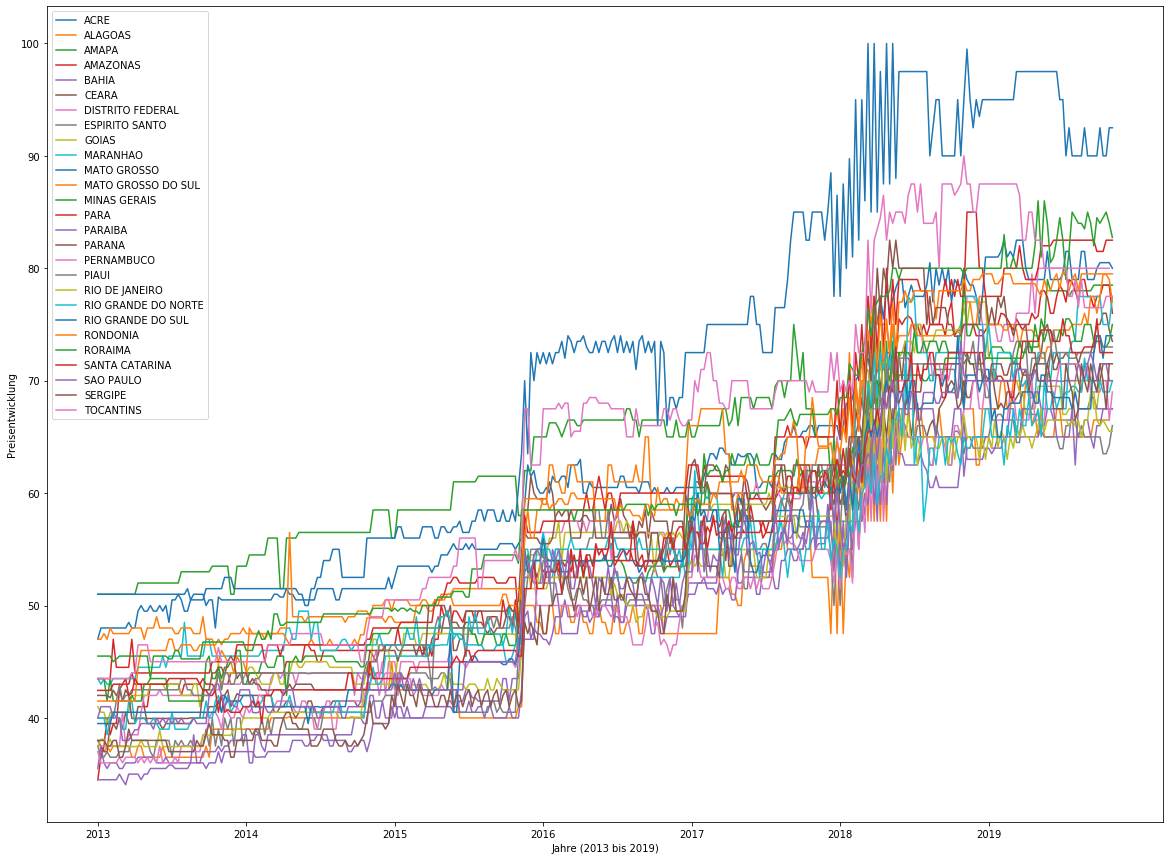

In [147]:
plt.figure(figsize=(20,15))

for name, group in grouped:    

    t = np.arange(0, len(group.Mittlerer_Verkaufspreis), 1)
    plt.plot(t, group['Mittlerer_Verkaufspreis'].values, label=name)    

plt.xlabel("Jahre (2013 bis 2019)")
plt.ylabel("Preisentwicklung")
plt.title = 'Preisentwicklung Benzin in Brasilien'
plt.xticks(np.arange(0, 329, 48), (2013, 2014, 2015, 2016, 2017, 2018, 2019))

plt.legend(loc='best')
plt.show()    

<h3>Diesel</h3>

In [38]:
grouped = df_diesel.groupby('Bundesland')

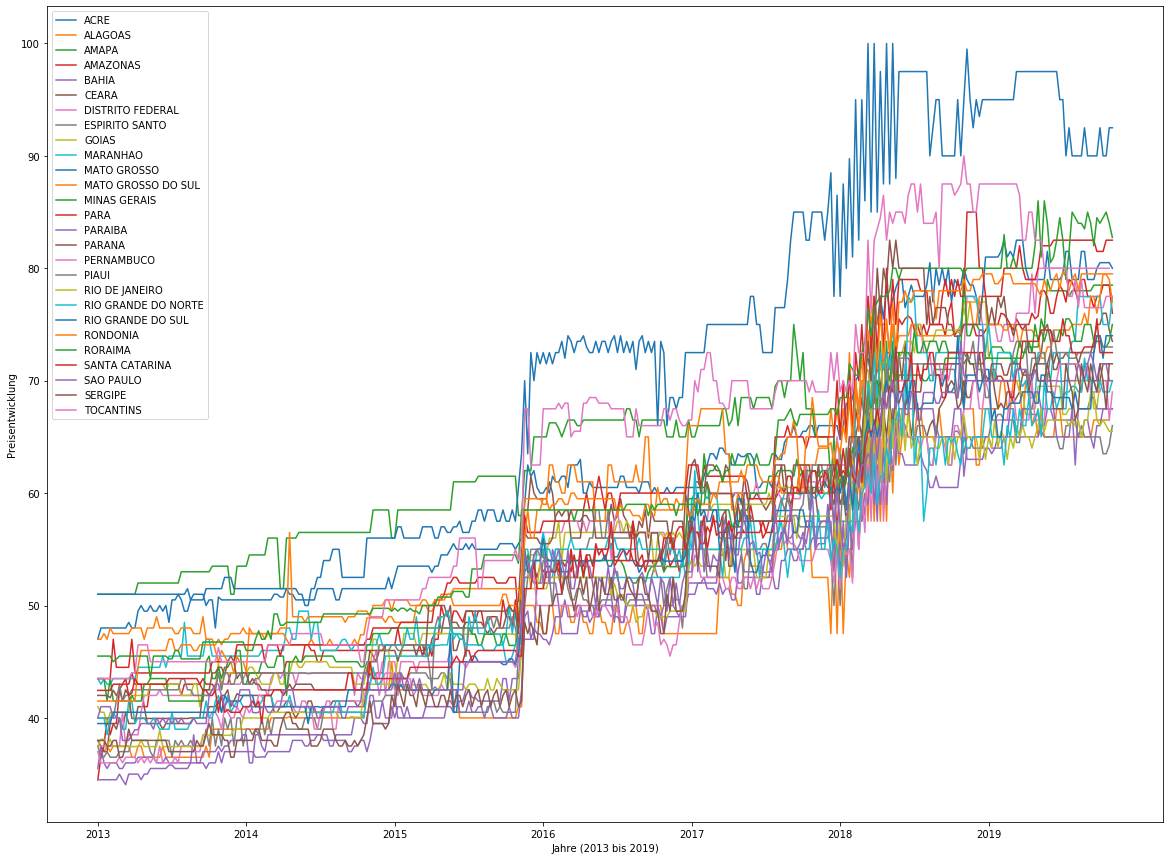

In [148]:
plt.figure(figsize=(20,15))

for name, group in grouped:
    t = np.arange(0, len(group.Mittlerer_Verkaufspreis), 1)
    plt.plot(t, group.Mittlerer_Verkaufspreis.values, label=name)

plt.xlabel("Jahre (2013 bis 2019)")
plt.ylabel("Preisentwicklung")
plt.title = 'Preisentwicklung Diesel in Brasilien'
plt.xticks(np.arange(0, 329, 48), (2013, 2014, 2015, 2016, 2017, 2018, 2019))

plt.legend(loc='best')
plt.show() 

<h3>Diesel S10</h3>

In [40]:
grouped = df_diesel_s10.groupby('Bundesland')

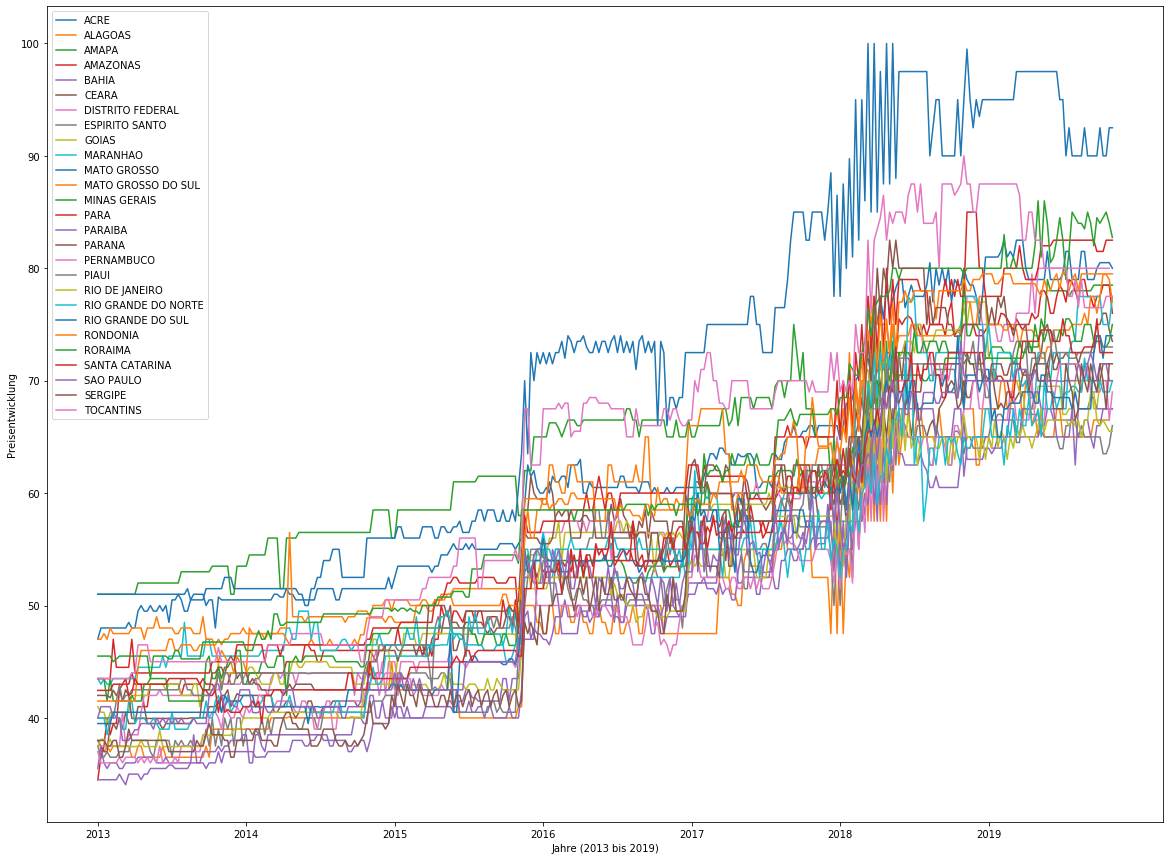

In [149]:
plt.figure(figsize=(20,15))

for name, group in grouped:
    t = np.arange(0, len(group.Mittlerer_Verkaufspreis), 1)
    plt.plot(t, group.Mittlerer_Verkaufspreis.values, label=name)

plt.xlabel("Jahre (2013 bis 2019)")
plt.ylabel("Preisentwicklung")
plt.title = 'Preisentwicklung Diesel in Brasilien'
plt.xticks(np.arange(0, 329, 48), (2013, 2014, 2015, 2016, 2017, 2018, 2019))

plt.legend(loc='best')
plt.show() 

<h3>Ethanol</h3>

In [42]:
grouped = df_etanol.groupby('Bundesland')

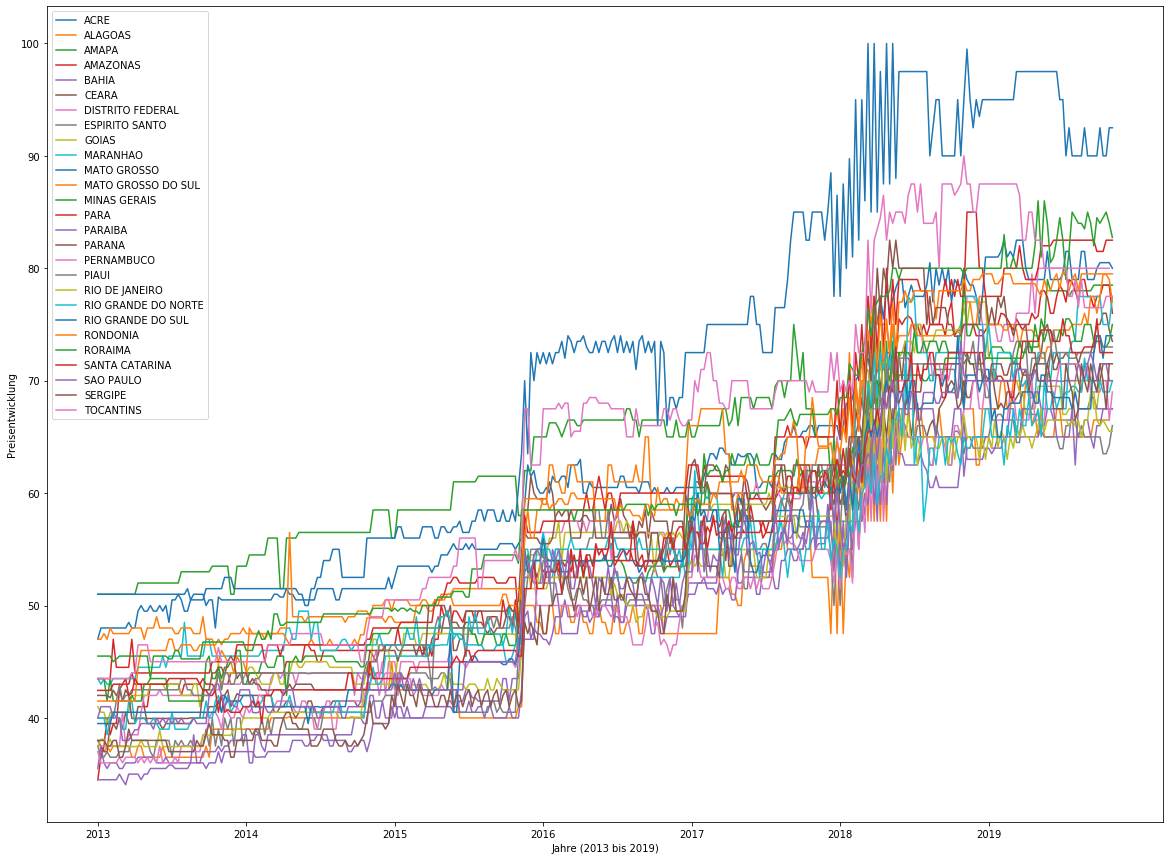

In [150]:
plt.figure(figsize=(20,15))

for name, group in grouped:
    t = np.arange(0, len(group.Mittlerer_Verkaufspreis), 1)
    plt.plot(t, group.Mittlerer_Verkaufspreis.values, label=name)

plt.xlabel("Jahre (2013 bis 2019)")
plt.ylabel("Preisentwicklung")
plt.title = 'Preisentwicklung Diesel in Brasilien'
plt.xticks(np.arange(0, 329, 48), (2013, 2014, 2015, 2016, 2017, 2018, 2019))

plt.legend(loc='best')
plt.show() 

<h3>GLP (Gas)</h3>

In [44]:
grouped = df_glp.groupby('Bundesland')

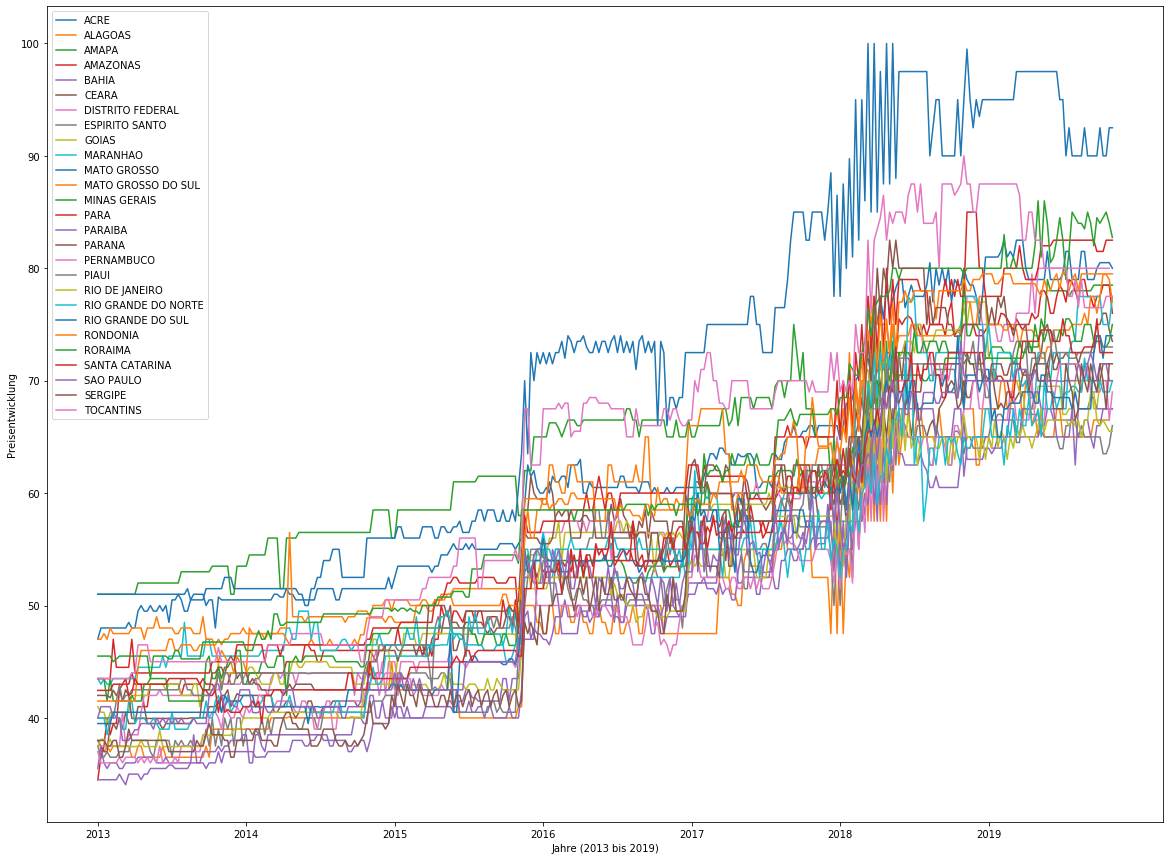

In [151]:
plt.figure(figsize=(20,15))

for name, group in grouped:
    t = np.arange(0, len(group.Mittlerer_Verkaufspreis), 1)
    plt.plot(t, group.Mittlerer_Verkaufspreis.values, label=name)

plt.xlabel("Jahre (2013 bis 2019)")
plt.ylabel("Preisentwicklung")
plt.title = 'Preisentwicklung Diesel in Brasilien'
plt.xticks(np.arange(0, 329, 48), (2013, 2014, 2015, 2016, 2017, 2018, 2019))

plt.legend(loc='best')
plt.show() 

<h2>Einfacher zeitlicher Verlauf von Treibstoffpreisen, international</h2>

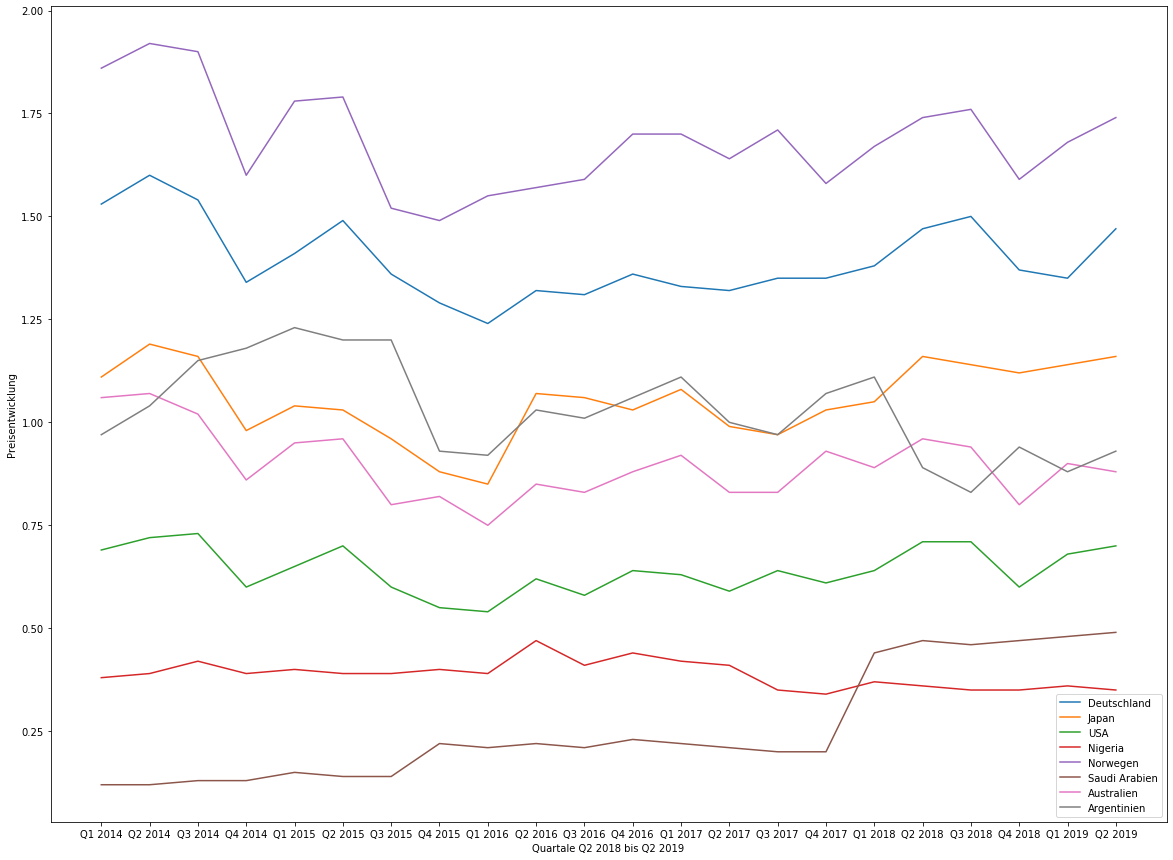

In [47]:
plt.figure(figsize=(20,15))

plt.plot(df_worldwide['Quartal'], df_worldwide['DE Benzin'].values, label='Deutschland')
plt.plot(df_worldwide['Quartal'], df_worldwide['JP Benzin'].values, label='Japan')
plt.plot(df_worldwide['Quartal'], df_worldwide['US Benzin'].values, label='USA')
plt.plot(df_worldwide['Quartal'], df_worldwide['NIG Benzin'].values, label='Nigeria')
plt.plot(df_worldwide['Quartal'], df_worldwide['NOR Benzin'].values, label='Norwegen')
plt.plot(df_worldwide['Quartal'], df_worldwide['SAU Benzin'].values, label='Saudi Arabien')
plt.plot(df_worldwide['Quartal'], df_worldwide['AUS Benzin'].values, label='Australien')
plt.plot(df_worldwide['Quartal'], df_worldwide['ARG Benzin'].values, label='Argentinien')

plt.xlabel("Quartale Q2 2018 bis Q2 2019")
plt.ylabel("Preisentwicklung")
plt.title = 'Preisentwicklung Benzin in Deutschland'

plt.legend(loc='best')
plt.show() 

<h2>Interaktive Karte, in der das Jahr eingestellt und dann pro Bundesstaat der durchschnittliche Preis von Treibstoffart abgerufen werden kann</h2>

In [107]:
from ipyleaflet import Map, Marker, LayerGroup
from ipywidgets import HTML
import ipywidgets as widgets

layer_group = LayerGroup()

def calculate(args):      
    
    layer_group.clear_layers()   
    
    condition = df_raw_brasil['Jahr'] == slider.value
    data = df_raw_brasil.loc[condition]

    condition = data['Treibstoff'] == menu.value
    data = data.loc[condition]
    
    for index, state in enumerate(br_state_coord):   
        
        popup = '<p>' + str(data.iloc[index,13]) + '</p>'
        
        marker = Marker(location=br_state_coord[state], draggable=False, title=state)
        
        marker_text = HTML()
        marker_text.value = '<h4>' + state + '</h4><h5>' + menu.value + ' - ' + str(slider.value) + '</h5><p>' + str(round(data.iloc[index,13], 2)) + ' Real</p>'
        marker.popup = marker_text
        
        layer_group.add_layer(marker)       

    

slider = widgets.IntSlider(
         value=2013,
         min=2013,
         max=2019,
         step=1,
         description='Jahr: ')

menu = widgets.Dropdown(
       options=['Benzin', 'Diesel', 'Diesel S10', 'Ethanol', 'Gas'],
       value='Benzin',
       description='Treibstoffart:')


slider.observe(calculate, ['value'])
menu.observe(calculate, ['value'])

box = widgets.VBox([slider])

center = (-11.552052, -51.539700)

m = Map(center=center, zoom=4)
m.add_layer(layer_group)

calculate(1)

box_h = widgets.HBox([slider, menu])
    
box_v = widgets.VBox([box_h, m])
box_v    


<h2>Lineare Regression mit Benzin-Werten</h2>

In [ ]:
grouped = df_benzin.groupby('Bundesland')

In [161]:
for name, group in grouped:    

    t = np.arange(0, len(group.Mittlerer_Verkaufspreis), 1)
    
    X = group[['Mittlerer_Verkaufspreis']].values
    Y = t
    
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)
            
    model = LinearRegression()
    model.fit(X_train, y_train)
    print(name, 'Score: ', model.score(X_test, y_test))
    
 

ACRE Score:  0.8972239542264606
ALAGOAS Score:  0.9086655597002234
AMAPA Score:  0.9510567399891438
AMAZONAS Score:  0.9237890550714453
BAHIA Score:  0.9527718806879208
CEARA Score:  0.945343004494614
DISTRITO FEDERAL Score:  0.9324040871805168
ESPIRITO SANTO Score:  0.913184640929618
GOIAS Score:  0.9154402479235101
MARANHAO Score:  0.8453146401489499
MATO GROSSO Score:  0.9125541955197298
MATO GROSSO DO SUL Score:  0.9047296134043553
MINAS GERAIS Score:  0.9178498418994485
PARA Score:  0.9445570052865788
PARAIBA Score:  0.9433850940414292
PARANA Score:  0.9401922293442743
PERNAMBUCO Score:  0.9311074078664294
PIAUI Score:  0.9470272036507715
RIO DE JANEIRO Score:  0.9374884265238371
RIO GRANDE DO NORTE Score:  0.9285893666222184
RIO GRANDE DO SUL Score:  0.9141067979869046
RONDONIA Score:  0.9319297968315904
RORAIMA Score:  0.9481795546136098
SANTA CATARINA Score:  0.93145503263295
SAO PAULO Score:  0.9258230679929381
SERGIPE Score:  0.8624638285098217
TOCANTINS Score:  0.91396921444